In [54]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load the dataset
parking_data = pd.read_csv("Parking_Violations_Issued_in_September_2024.csv", low_memory=False)


In [56]:
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98493 entries, 0 to 98492
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              98493 non-null  int64  
 1   TICKET_NUMBER         98493 non-null  int64  
 2   VIOLATION_TYPE_DESC   98493 non-null  object 
 3   ISSUE_DATE            98493 non-null  object 
 4   ISSUE_TIME            98493 non-null  int64  
 5   ISSUING_AGENCY_CODE   98493 non-null  int64  
 6   ISSUING_AGENCY_NAME   98493 non-null  object 
 7   ISSUING_AGENCY_SHORT  98493 non-null  object 
 8   VIOLATION_CODE        98493 non-null  object 
 9   VIOLATION_PROC_DESC   98485 non-null  object 
 10  LOCATION              98493 non-null  object 
 11  PLATE_STATE           98493 non-null  object 
 12  VEHICLE_TYPE          0 non-null      float64
 13  MULTI_OWNER_NUMBER    98493 non-null  int64  
 14  DISPOSITION_CODE      98493 non-null  int64  
 15  DISPOSITION_TYPE   

In [65]:
# Select relevant features and target variable
data = parking_data[['FINE_AMOUNT','VIOLATION_TYPE_DESC', 'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'XCOORD', 'YCOORD']].copy()

data

,FINE_AMOUNT,VIOLATION_TYPE_DESC,ISSUE_TIME,ISSUING_AGENCY_CODE,XCOORD,YCOORD
0,100,P,657,54,NaN,NaN
1,30,P,133,59,NaN,NaN
2,30,P,1020,59,397076.780,135370.390
3,100,P,1051,59,397328.708,135348.587
4,100,P,1108,59,397328.637,135237.646
...,...,...,...,...,...,...
98488,30,P,1535,15,399383.850,135200.010
98489,100,P,1638,15,399995.838,135331.512
98490,100,P,1639,15,399995.838,135331.512
98491,100,P,1640,15,399995.838,135331.512


In [66]:
# Drop rows with missing values in the selected columns
data.dropna(inplace=True)


In [57]:
# Select relevant features and target variable
data = parking_data[['FINE_AMOUNT', 'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'XCOORD', 'YCOORD']].copy()

data

,FINE_AMOUNT,ISSUE_TIME,ISSUING_AGENCY_CODE,XCOORD,YCOORD
0,100,657,54,NaN,NaN
1,30,133,59,NaN,NaN
2,30,1020,59,397076.780,135370.390
3,100,1051,59,397328.708,135348.587
4,100,1108,59,397328.637,135237.646
...,...,...,...,...,...
98488,30,1535,15,399383.850,135200.010
98489,100,1638,15,399995.838,135331.512
98490,100,1639,15,399995.838,135331.512
98491,100,1640,15,399995.838,135331.512


In [58]:
# Drop rows with missing values in the selected columns
data.dropna(inplace=True)


In [60]:
# Encode X-variable(s) to into integers
data['ISSUING_AGENCY_CODE'] = data['ISSUING_AGENCY_CODE'].astype('category').cat.codes

# Change y-variable to categorical type
data['FINE_AMOUNT'] = data['FINE_AMOUNT'].astype('category')
# Save categories
violation_categories = data['FINE_AMOUNT'].cat.categories
# Encode categories as integers
data['FINE_AMOUNT'] = data['FINE_AMOUNT'].cat.codes

# Create a mapping of integer codes to category names
violation_mapping = dict(enumerate(violation_categories))
print("FINE_AMOUNT Mapping:")
display(violation_mapping)

FINE_AMOUNT Mapping:


{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16}

In [61]:
# Define features (X) and target variable (y)
X = data[['ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'XCOORD', 'YCOORD']]
y = data['FINE_AMOUNT']


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
## Initial Random Forest Model
" Amachine learning model provided by Scikit-learn that implements the Random Forest algorithm for classification tasks. It is an ensemble method that combines multiple decision trees to improve accuracy, reduce overfitting, and handle complex data. Each tree in the Random Forest is trained on a random sample of the data (with replacement), a process known as bagging (Bootstrap Aggregation). At each split in a decision tree, a random subset of features is considered rather than using all features. This decorrelates the trees and prevents them from making the same mistakes." - Chat GPT

SyntaxError: invalid syntax (3921939292.py, line 2)

In [20]:
# Drop irrelevant or mostly empty columns, ignoring if they don't exist
parking_data.drop([ 'DISPOSITION_DESC', 
         'VEHICLE_TYPE', 'DISPOSITION_DATE'], 
        axis=1, errors='ignore', inplace=True)

In [21]:
# Display all column names
print("Available columns:", parking_data.columns.tolist())

Available columns: ['VIOLATION_TYPE_DESC', 'ISSUE_DATE', 'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT', 'VIOLATION_CODE', 'VIOLATION_PROC_DESC', 'LOCATION', 'PLATE_STATE', 'MULTI_OWNER_NUMBER', 'DISPOSITION_CODE', 'DISPOSITION_TYPE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'MAR_ID']


In [25]:
# Convert 'ISSUE_DATE' to datetime
parking_data['ISSUE_DATE'] = pd.to_datetime(parking_data['ISSUE_DATE'], errors='coerce')

# Extract additional date features
parking_data['ISSUE_MONTH'] = parking_data['ISSUE_DATE'].dt.month
parking_data['ISSUE_DAY'] = parking_data['ISSUE_DATE'].dt.day
parking_data['ISSUE_WEEKDAY'] = parking_data['ISSUE_DATE'].dt.weekday
parking_data['ISSUE_HOUR'] = parking_data['ISSUE_TIME'].apply(lambda x: int(str(x).zfill(4)[:2]) if not pd.isna(x) else np.nan)

C:\Users\aysen\anaconda\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


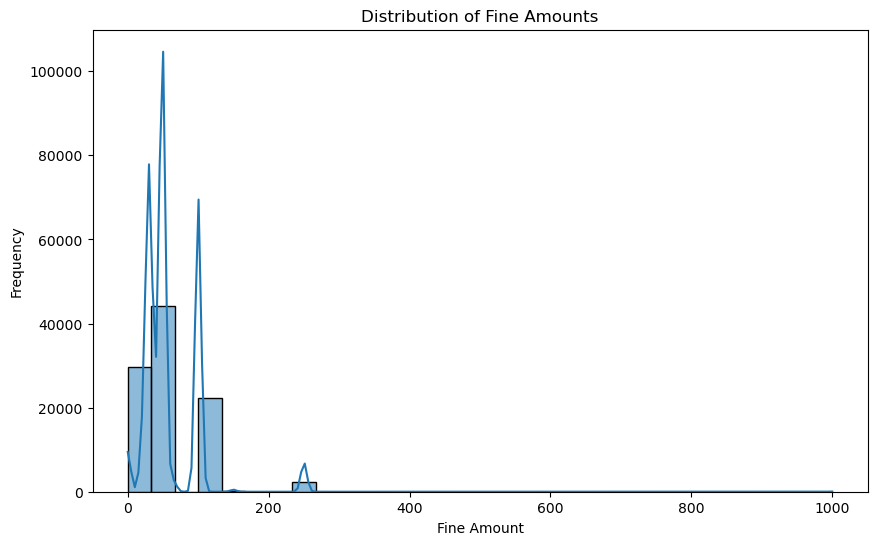

ValueError: could not convert string to float: 'SEH'

<Figure size 1200x800 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(parking_data['FINE_AMOUNT'], bins=30, kde=True)
plt.title("Distribution of Fine Amounts")
plt.xlabel("Fine Amount")
plt.ylabel("Frequency")
plt.show()

# Check correlations
plt.figure(figsize=(12, 8))
sns.heatmap(parking_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
# Check for non-numeric values in the dataset
for column in parking_data.columns:
    non_numeric_values = parking_data[column].apply(lambda x: isinstance(x, str)).sum()
    if non_numeric_values > 0:
        print(f"Column '{column}' has {non_numeric_values} non-numeric values.")

Column 'ISSUING_AGENCY_SHORT' has 98493 non-numeric values.
Column 'VIOLATION_CODE' has 98493 non-numeric values.
Column 'VIOLATION_PROC_DESC' has 98485 non-numeric values.
Column 'DISPOSITION_TYPE' has 98493 non-numeric values.


In [49]:
########??????
parking_data['ISSUING_AGENCY_SHORT'].fillna(0, inplace=True)  # Fill with 0


C:\Users\aysen\AppData\Local\Temp\ipykernel_22868\226228616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  parking_data['ISSUING_AGENCY_SHORT'].fillna(0, inplace=True)  # Fill with 0


In [ ]:
parking_data.dropna(subset=['FINE_AMOUNT'], inplace=True)

In [44]:
# Convert numeric columns to proper types
parking_data['ISSUE_TIME'] = pd.to_numeric(parking_data['ISSUE_TIME'], errors='coerce')
parking_data['FINE_AMOUNT'] = pd.to_numeric(parking_data['FINE_AMOUNT'], errors='coerce')


In [45]:
# Fill missing numeric values with 0 or the mean
parking_data['ISSUE_TIME'].fillna(parking_data['ISSUE_TIME'].mean(), inplace=True)
parking_data['FINE_AMOUNT'].fillna(parking_data['FINE_AMOUNT'].mean(), inplace=True)


C:\Users\aysen\AppData\Local\Temp\ipykernel_22868\4146649947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  parking_data['ISSUE_TIME'].fillna(parking_data['ISSUE_TIME'].mean(), inplace=True)
C:\Users\aysen\AppData\Local\Temp\ipykernel_22868\4146649947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [46]:
# Encode categorical columns
parking_data = pd.get_dummies(parking_data, columns=['VIOLATION_TYPE_DESC', 'PLATE_STATE', 'LOCATION'], drop_first=True)

KeyError: "None of [Index(['VIOLATION_TYPE_DESC', 'PLATE_STATE', 'LOCATION'], dtype='object')] are in the [columns]"

In [48]:
# Display all column names to confirm their presence
print("Available columns:", parking_data.columns.tolist())

Available columns: ['ISSUE_DATE', 'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_SHORT', 'VIOLATION_CODE', 'VIOLATION_PROC_DESC', 'MULTI_OWNER_NUMBER', 'DISPOSITION_CODE', 'DISPOSITION_TYPE', 'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3', 'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'MAR_ID', 'ISSUE_MONTH', 'ISSUE_DAY', 'ISSUE_WEEKDAY', 'ISSUE_HOUR', 'VIOLATION_TYPE_DESC_P', 'VIOLATION_TYPE_DESC_T', 'VIOLATION_TYPE_DESC_V', 'PLATE_STATE_AL', 'PLATE_STATE_CO', 'PLATE_STATE_DC', 'PLATE_STATE_FL', 'PLATE_STATE_GA', 'PLATE_STATE_IL', 'PLATE_STATE_IN', 'PLATE_STATE_LA', 'PLATE_STATE_MD', 'PLATE_STATE_MI', 'PLATE_STATE_MN', 'PLATE_STATE_MO', 'PLATE_STATE_NC', 'PLATE_STATE_NJ', 'PLATE_STATE_NV', 'PLATE_STATE_OH', 'PLATE_STATE_OK', 'PLATE_STATE_SC', 'PLATE_STATE_TX', 'PLATE_STATE_VA', 'PLATE_STATE_VT', 'PLATE_STATE_WA', 'PLATE_STATE_WI', 'PLATE_STATE_WV', 'ISSUING_AGENCY_NAME_COMMAND INFORMATION CENTER', 'ISSUING_AGENCY_NAME_DDOT', 'ISSUING_

In [34]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = parking_data.drop(['FINE_AMOUNT'], axis=1)
y = parking_data['FINE_AMOUNT']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

ValueError: Input contains NaN

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest Regressor - R² Score:", r2_score(y_test, y_rf_pred))

In [ ]:
# Feature Importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()

In [7]:
# Convert 'ISSUE_DATE' to datetime
df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_DATE'], errors='coerce')

# Extract additional date features
df['ISSUE_MONTH'] = df['ISSUE_DATE'].dt.month
df['ISSUE_DAY'] = df['ISSUE_DATE'].dt.day
df['ISSUE_WEEKDAY'] = df['ISSUE_DATE'].dt.weekday
df['ISSUE_HOUR'] = df['ISSUE_DATE'].apply(lambda x: int(str(x).zfill(4)[:2]) if not pd.isna(x) else np.nan)

NameError: name 'df' is not defined

In [ ]:
# Check unique values for categorical columns
print("\nUnique values in 'VIOLATION_TYPE_DESC':", df['VIOLATION_TYPE_DESC'].unique())
print("\nUnique values in 'PLATE_STATE':", df['PLATE_STATE'].unique())

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['VIOLATION_TYPE_DESC', 'PLATE_STATE', 'ISSUING_AGENCY_NAME', 'LOCATION'], drop_first=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['FINE_AMOUNT'], bins=30, kde=True)
plt.title("Distribution of Fine Amounts")
plt.xlabel("Fine Amount")
plt.ylabel("Frequency")
plt.show()

# Check correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['FINE_AMOUNT'], axis=1)
y = df['FINE_AMOUNT']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
parking_data.dropna(inplace=True)

In [ ]:
parking_data['VIOLATION_TYPE_DESC']=parking_data['VIOLATION_TYPE_DESC'].astype('category').cat.codes
parking_data['ISSUING_AGENCY_CODE']=parking_data['ISSUING_AGENCY_CODE'].astype('category').cat.codes

In [ ]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Alternatively, show percentage of missing values
print("\nPercentage of Missing Values per Column:")
print((df.isnull().mean() * 100).round(2))

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing target values
df.dropna(subset=['FINE_AMOUNT'], inplace=True)

# Fill or drop other missing values as needed
df.fillna('Unknown', inplace=True)

# Convert 'issue_date' to datetime format
df['ISSUE_TIME'] = pd.to_datetime(df['ISSUE_TIME'], errors='coerce')

# Convert categorical columns to 'category' type for memory efficiency
df['VIOLATION_CODE'] = df['VIOLATION_CODE'].astype('category')
df['LOCATION'] = df['LOCATION'].astype('category')

# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fine amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['FINE_AMOUNT'], bins=30, kde=True)
plt.title("Distribution of Fine Amounts")
plt.show()

# Violation type vs. Fine Amount
plt.figure(figsize=(12, 8))
sns.boxplot(x='VIOLATION_CODE', y='FINE_AMOUNT', data=df)
plt.xticks(rotation=90)
plt.title("Violation Code vs Fine Amount")
plt.show()

# Time of day vs. Fine Amount
plt.figure(figsize=(10, 6))
df['ISSUE_DATE'] = pd.to_datetime(df['ISSUE_TIME'], format='%H%M', errors='coerce').dt.hour
sns.boxplot(x='ISSUE_DATE', y='FINE_AMOUNT', data=df)
plt.title("Hour of the Day vs Fine Amount")
plt.show()

In [ ]:
# Features and Target
X = df.drop(columns=['FINE_AMOUNT', 'ISSUE_TIME'])
y = df['FINE_AMOUNT']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))

In [ ]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))

In [ ]:
import joblib

# Save the best-performing model
joblib.dump(rf_model, 'fine_amount_predictor.pkl')

In [ ]:
# Check data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

In [ ]:
# Check unique values in each column
print("\nNumber of Unique Values per Column:")
print(df.nunique())

In [ ]:
# Summary statistics for the target variable 'fine_amount'
print("\nSummary Statistics for Fine Amount:")
print(df['FINE_AMOUNT'].describe())

# Check the distribution of fine amounts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['FINE_AMOUNT'], bins=30, kde=True)
plt.title("Distribution of Fine Amounts")
plt.xlabel("Fine Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df = pd.DataFrame({'values': ['123.45', '67.89', 'P', '45.67']})
df['values'] = pd.to_numeric(df['values'], errors='coerce')

# Drop rows with NaN (optional)
df.dropna(inplace=True)

print(df)

In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())

# Visualize correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Display last few rows
print("\nLast 5 Rows:")
print(df.tail())

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing target values
df.dropna(subset=['FINE_AMOUNT'], inplace=True)

# Fill or drop other missing values as needed
df.fillna('Unknown', inplace=True)

# Convert 'issue_date' to datetime format
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

# Convert categorical columns to 'category' type for memory efficiency
df['violation_code'] = df['violation_code'].astype('category')
df['vehicle_type'] = df['vehicle_type'].astype('category')
df['location'] = df['location'].astype('category')

# Remove duplicates if any
df.drop_duplicates(inplace=True)